# Nino34 Response
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [1]:
%matplotlib notebook
!date

import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['hatch.color']='g'
import xarray as xr
from scipy.stats import ttest_1samp
import sys

from plotsetting import *
from geoplots import mapplot, xticksyear, xticksmonth, yticks2lat
import geoxarray

Mon May 21 11:32:01 EDT 2018
[Start] matplotlib settings: ####################
Python: 3.6.5
matplotlib: 2.2.2 backend nbAgg
interactive = True
figure.max_open_warning = 50
hatch.linewidth = 0.5
hatch.color = gray
legend.frameon = False
savefig.bbox = tight
savefig.format = pdf
[End] matplotlib settings. ####################


In [2]:
# parameters
data_name = 't_surf'
figname = f'fig_nino34.pdf'
# prcp_scale = 3600 * 24

lons = dict(nino12=slice(360-90,360-80), 
    nino3=slice(360-150, 360-90),
    nino34=slice(360-170, 360-120),
    nino4=slice(160, 360-150))
lats = dict(nino12=slice(-10,0),
    nino3=slice(-5,5),
    nino34=slice(-5,5),
    nino4=slice(-5,5))

### Agung data

In [3]:
# Agung data
from data_CTL1860 import open_ensemble as get_ctl
from data_agung import open_data as get_volcano
volcano_name = 'Agung'
year_volcano = 1963
ens = range(1,31)
nbname = 'volcano_impact_on_climate_agung.ipynb'
new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

ncfile = f'cache/{nbname}.{data_name}.ctl.nc'
try:
    da_ctl = xr.open_dataarray(ncfile).load()
    print('Data loaded from', ncfile)
except:
    da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
    da_ctl.to_dataset().to_netcdf(ncfile)
    print('Data calculated and saved to', ncfile)

ncfile = f'cache/{nbname}.{data_name}.nc'
try:
    da_volcano = xr.open_dataarray(ncfile).load()
    print('Data loaded from', ncfile)
except:
    da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()
    da_volcano.to_dataset().to_netcdf(ncfile)
    print('Data calculated and saved to', ncfile)

ts_ctl = da_ctl.sel(lon=lons['nino34'], lat=lats['nino34']).geo.fldmean()
ts_volc = da_volcano.sel(lon=lons['nino34'], lat=lats['nino34']).geo.fldmean()
ts_ctl_clim = ts_ctl.groupby('time.month').mean(['time', 'en'])
tsa_ctl = ts_ctl.groupby('time.month') - ts_ctl_clim
tsa_volc = ts_volc.groupby('time.month') - ts_ctl_clim

nino_i = tsa_ctl.sel(time=slice('1963-10', '1963-12')).mean('time')
ens_dict = dict()
ens_dict['nino'] = nino_i.en[nino_i > nino_i.quantile(0.67)].values
ens_dict['nina'] = nino_i.en[nino_i < nino_i.quantile(0.33)].values
ens_dict['neut'] = [en for en in range(1,31) if en not in ens_dict['nino'] and en not in ens_dict['nina']]

agung = dict(nino34_ctl=tsa_ctl, nino34_volc=tsa_volc)


Data loaded from cache/volcano_impact_on_climate_agung.ipynb.t_surf.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.t_surf.nc


### StMaria data

In [4]:
# St Maria data
from data_CTL1860 import open_ensemble as get_ctl
from data_stmaria import open_data as get_volcano
volcano_name = 'StMaria'
year_volcano = 1902
ens = range(1,30+1)
nbname = 'volcano_impact_on_climate_stmaria.ipynb'
new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

ncfile = f'cache/{nbname}.{data_name}.ctl.nc'
try:
    da_ctl = xr.open_dataarray(ncfile).load()
    print('Data loaded from', ncfile)
except:
    da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
    da_ctl.to_dataset().to_netcdf(ncfile)
    print('Data calculated and saved to', ncfile)

ncfile = f'cache/{nbname}.{data_name}.nc'
try:
    da_volcano = xr.open_dataarray(ncfile).load()
    print('Data loaded from', ncfile)
except:
    da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()
    da_volcano.to_dataset().to_netcdf(ncfile)
    print('Data calculated and saved to', ncfile)

ts_ctl = da_ctl.sel(lon=lons['nino34'], lat=lats['nino34']).geo.fldmean()
ts_volc = da_volcano.sel(lon=lons['nino34'], lat=lats['nino34']).geo.fldmean()
ts_ctl_clim = ts_ctl.groupby('time.month').mean(['time', 'en'])
tsa_ctl = ts_ctl.groupby('time.month') - ts_ctl_clim
tsa_volc = ts_volc.groupby('time.month') - ts_ctl_clim

stmaria = dict(nino34_ctl=tsa_ctl, nino34_volc=tsa_volc)


Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.t_surf.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.t_surf.nc


### Plot

<IPython.core.display.Javascript object>


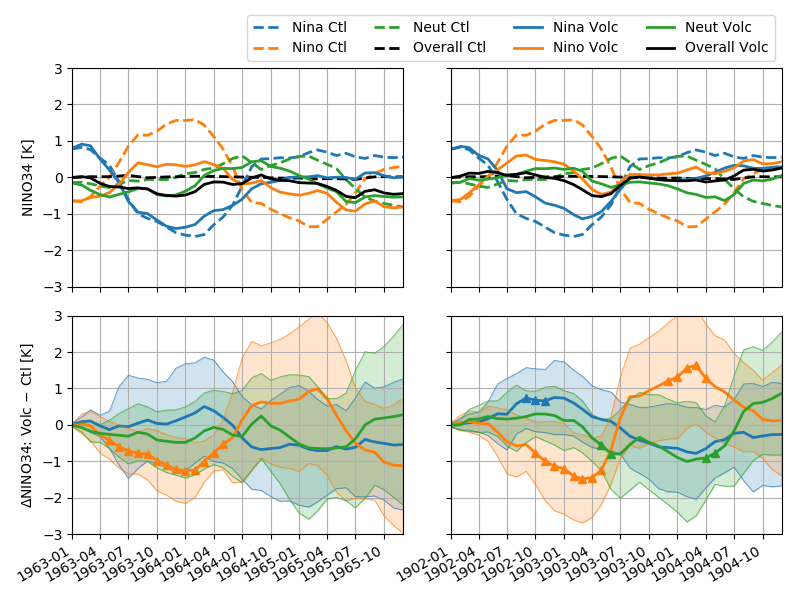

In [42]:
# plot
rcParams['hatch.color'] = 'lightgray'
hatch_pattern = ['.....']
alpha = 0.2
yticks = range(-90, 91, 30)
lw_edge = .5
ls_edge = '-'
alpha_edge = .8
marker_sig = '^'

fig, axes = plt.subplots(2,2,figsize=(8,6), sharey='row', sharex='col')
# ############
plt.sca(axes[0,0])

agung['nino34_ctl'].sel(en=ens_dict['nina']).mean('en').plot(label='Nina Ctl', color='C0', linestyle='--')
agung['nino34_ctl'].sel(en=ens_dict['nino']).mean('en').plot(label='Nino Ctl', color='C1', linestyle='--')
agung['nino34_ctl'].sel(en=ens_dict['neut']).mean('en').plot(label='Neut Ctl', color='C2', linestyle='--')
agung['nino34_ctl'].mean('en').plot(label='Overall Ctl', color='k', linestyle='--')

agung['nino34_volc'].sel(en=ens_dict['nina']).mean('en').plot(label='Nina Volc', color='C0', linestyle='-')
agung['nino34_volc'].sel(en=ens_dict['nino']).mean('en').plot(label='Nino Volc', color='C1', linestyle='-')
agung['nino34_volc'].sel(en=ens_dict['neut']).mean('en').plot(label='Neut Volc', color='C2', linestyle='-')
agung['nino34_volc'].mean('en').plot(label='Overall Volc', color='k', linestyle='-')

xticksmonth(range(1,13,3))
plt.grid(True)
plt.xlim(agung['nino34_ctl'].time.isel(time=[0,-1]).to_index())
plt.ylim(-3,3)
plt.ylabel('NINO34 [K]')
plt.xlabel('')

# sys.exit()

# ##########
plt.sca(axes[0,1])

stmaria['nino34_ctl'].sel(en=ens_dict['nina']).mean('en').plot(label='Nina Ctl', color='C0', linestyle='--')
stmaria['nino34_ctl'].sel(en=ens_dict['nino']).mean('en').plot(label='Nino Ctl', color='C1', linestyle='--')
stmaria['nino34_ctl'].sel(en=ens_dict['neut']).mean('en').plot(label='Neut Ctl', color='C2', linestyle='--')
stmaria['nino34_ctl'].mean('en').plot(label='Overall Ctl', color='k', linestyle='--')

stmaria['nino34_volc'].sel(en=ens_dict['nina']).mean('en').plot(label='Nina Volc', color='C0', linestyle='-')
stmaria['nino34_volc'].sel(en=ens_dict['nino']).mean('en').plot(label='Nino Volc', color='C1', linestyle='-')
stmaria['nino34_volc'].sel(en=ens_dict['neut']).mean('en').plot(label='Neut Volc', color='C2', linestyle='-')
stmaria['nino34_volc'].mean('en').plot(label='Overall Volc', color='k', linestyle='-')

xticksmonth(range(1,13,3))
plt.grid(True)
plt.xlim(stmaria['nino34_ctl'].time.isel(time=[0,-1]).to_index())
plt.legend(frameon=True, loc='lower right',  bbox_to_anchor=(1,1), ncol=4)
plt.xlabel('')


# ############
plt.sca(axes[1,0])

dnino34 = (agung['nino34_volc'] - agung['nino34_ctl']).sel(en=ens_dict['nina'])
plt.fill_between(dnino34.time.to_index().to_pydatetime(),
    dnino34.mean('en') - dnino34.std('en'),
    dnino34.mean('en') + dnino34.std('en'),
    alpha=alpha, color='C0')
dnino34.mean('en').plot(label='Nina Ens.',color='C0')
(dnino34.mean('en') - dnino34.std('en')).plot(label=None, lw=lw_edge, ls=ls_edge, color='C0', alpha=alpha_edge)
(dnino34.mean('en') + dnino34.std('en')).plot(label=None, lw=lw_edge, ls=ls_edge, color='C0', alpha=alpha_edge)
s = dnino34.std('en').pipe(lambda x: x*2.262/3) # .05 significance level
dnino34.mean('en')[np.abs(dnino34.mean('en'))>s].plot(color='C0', marker=marker_sig, ls='None')

dnino34 = (agung['nino34_volc'] - agung['nino34_ctl']).sel(en=ens_dict['nino'])
plt.fill_between(dnino34.time.to_index().to_pydatetime(),
    dnino34.mean('en') - dnino34.std('en'),
    dnino34.mean('en') + dnino34.std('en'),
    alpha=0.2, color='C1')
dnino34.mean('en').plot(label='Nino Years', color='C1')
(dnino34.mean('en') - dnino34.std('en')).plot(label=None, lw=lw_edge, ls=ls_edge, color='C1', alpha=alpha_edge)
(dnino34.mean('en') + dnino34.std('en')).plot(label=None, lw=lw_edge, ls=ls_edge, color='C1', alpha=alpha_edge)
s = dnino34.std('en').pipe(lambda x: x*2.262/3) # .05 significance level
dnino34.mean('en')[np.abs(dnino34.mean('en'))>s].plot(color='C1', marker=marker_sig, ls='None')

dnino34 = (agung['nino34_volc'] - agung['nino34_ctl']).sel(en=ens_dict['neut'])
plt.fill_between(dnino34.time.to_index().to_pydatetime(),
    dnino34.mean('en') - dnino34.std('en'),
    dnino34.mean('en') + dnino34.std('en'),
    alpha=0.2, color='C2')
dnino34.mean('en').plot(label='Neut Years', color='C2')
(dnino34.mean('en') - dnino34.std('en')).plot(label=None, lw=lw_edge, ls=ls_edge, color='C2', alpha=alpha_edge)
(dnino34.mean('en') + dnino34.std('en')).plot(label=None, lw=lw_edge, ls=ls_edge, color='C2', alpha=alpha_edge)
s = dnino34.std('en').pipe(lambda x: x*2.262/3) # .05 significance level
dnino34.mean('en')[np.abs(dnino34.mean('en'))>s].plot(color='w', ls='None')

# dnino34 = agung['nino34_volc'] - agung['nino34_ctl']
# dnino34.mean('en').plot(label='Overall', color='k')
# s = dnino34.std('en').pipe(lambda x: x*2.262/3) # .05 significance level
# dnino34.mean('en')[np.abs(dnino34.mean('en'))>s].plot(color='k', marker=marker_sig, ls='None')


xticksmonth(range(1,13,3))
plt.grid(True)
plt.ylim(-3,3)
plt.ylabel('$\Delta$NINO34: Volc $-$ Ctl [K]')
plt.xlabel('')

# ############
plt.sca(axes[1,1])

dnino34 = (stmaria['nino34_volc'] - stmaria['nino34_ctl']).sel(en=ens_dict['nina'])
plt.fill_between(dnino34.time.to_index().to_pydatetime(),
    dnino34.mean('en') - dnino34.std('en'),
    dnino34.mean('en') + dnino34.std('en'),
    alpha=alpha, color='C0')
dnino34.mean('en').plot(label='Nina Ens.',color='C0')
(dnino34.mean('en') - dnino34.std('en')).plot(label=None, lw=lw_edge, ls=ls_edge, color='C0', alpha=alpha_edge)
(dnino34.mean('en') + dnino34.std('en')).plot(label=None, lw=lw_edge, ls=ls_edge, color='C0', alpha=alpha_edge)
s = dnino34.std('en').pipe(lambda x: x*2.262/3) # .05 significance level
dnino34.mean('en')[np.abs(dnino34.mean('en'))>s].plot(color='C0', marker=marker_sig, ls='None')

dnino34 = (stmaria['nino34_volc'] - stmaria['nino34_ctl']).sel(en=ens_dict['nino'])
plt.fill_between(dnino34.time.to_index().to_pydatetime(),
    dnino34.mean('en') - dnino34.std('en'),
    dnino34.mean('en') + dnino34.std('en'),
    alpha=0.2, color='C1')
dnino34.mean('en').plot(label='Nino Years', color='C1')
(dnino34.mean('en') - dnino34.std('en')).plot(label=None, lw=lw_edge, ls=ls_edge, color='C1', alpha=alpha_edge)
(dnino34.mean('en') + dnino34.std('en')).plot(label=None, lw=lw_edge, ls=ls_edge, color='C1', alpha=alpha_edge)
s = dnino34.std('en').pipe(lambda x: x*2.262/3) # .05 significance level
dnino34.mean('en')[np.abs(dnino34.mean('en'))>s].plot(color='C1', marker=marker_sig, ls='None')

dnino34 = (stmaria['nino34_volc'] - stmaria['nino34_ctl']).sel(en=ens_dict['neut'])
plt.fill_between(dnino34.time.to_index().to_pydatetime(),
    dnino34.mean('en') - dnino34.std('en'),
    dnino34.mean('en') + dnino34.std('en'),
    alpha=0.2, color='C2')
dnino34.mean('en').plot(label='Neut Years', color='C2')
(dnino34.mean('en') - dnino34.std('en')).plot(label=None, lw=lw_edge, ls=ls_edge, color='C2', alpha=alpha_edge)
(dnino34.mean('en') + dnino34.std('en')).plot(label=None, lw=lw_edge, ls=ls_edge, color='C2', alpha=alpha_edge)
s = dnino34.std('en').pipe(lambda x: x*2.262/3) # .05 significance level
dnino34.mean('en')[np.abs(dnino34.mean('en'))>s].plot(color='C2', marker=marker_sig, ls='None')

# dnino34 = stmaria['nino34_volc'] - stmaria['nino34_ctl']
# dnino34.mean('en').plot(label='Overall', color='k')
# s = dnino34.std('en').pipe(lambda x: x*2.262/3) # .05 significance level
# dnino34.mean('en')[np.abs(dnino34.mean('en'))>s].plot(color='k', marker=marker_sig, ls='None')


plt.grid(True)
xticksmonth(range(1,13,3))
plt.xlabel('')


plt.tight_layout(w_pad=-15)

plt.savefig(figname)